In [6]:
import random
import pandas as pd
import time
import numpy


intervals = {
    'midnight': 0,
    'morning': 8,
    'afternoon': 12,
    'evening': 18,
    'late': 24
}

rates = {
    'midnight': 2,
    'morning': 8,
    'afternoon': 4,
    'evening': 7,
    'late': 2
}

sig = 1

def get_cars(hour_of_day):
    mu = get_params(hour_of_day)
    return random.gauss(mu, sig)

def get_params(hour):
    ''' 
    Returns the parameters given hour of day.
    Uses formula m = (y2 - y1) / (x2 - x1)
    '''
    if hour < 8:
        # Fit first line.
        x1 = intervals['midnight']
        x2 = intervals['morning']
        y1 = rates['midnight']
        y2 = rates['morning']

    elif hour <= 12:
        x1 = intervals['morning']
        x2 = intervals['afternoon']
        y1 = rates['morning']
        y2 = rates['afternoon']

    elif hour <= 18:
        x1 = intervals['afternoon']
        x2 = intervals['evening']
        y1 = rates['afternoon']
        y2 = rates['evening']

    elif hour < 24:
        x1 = intervals['evening']
        x2 = intervals['late']
        y1 = rates['evening']
        y2 = rates['late']

    else:
        return 5

    m = (y2 - y1) / (x2 - x1)
    yint = y1 - m * x1
    return m * hour + yint

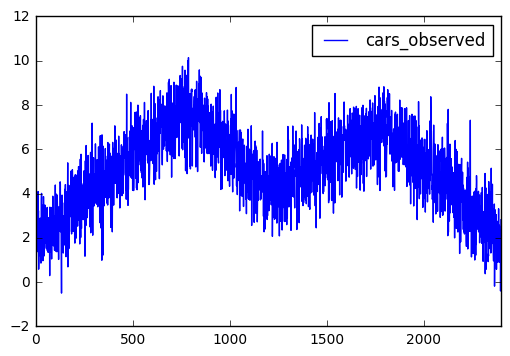

In [7]:
%matplotlib inline
df = pd.DataFrame({'cars_observed': [get_cars(i) for i in numpy.arange(0, 24, 0.01)]})
df.plot()